In [51]:
ct = '../data/2018_2006.tsv'
scores = '../out/ko_scores_s288c.txt'
old = '../data/parsons_2006.tsv'

In [52]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=11)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)

In [53]:
# other imports
import random
import numpy as np
import pandas as pd
from scipy import stats

In [54]:
d = {}
for b, h, n in pd.read_table(ct).values:
    d[b] = h

In [55]:
m = pd.read_table(scores, index_col=0).loc['S288C'].reset_index()
m['condition'] = [x.lower()
                  for x in m['condition']]
m = m.set_index(['condition', 'gene'])
n = m['score']
m.sort_index(inplace=True)
o = pd.read_table(old,
                  index_col=0,
                  na_values=['  '])
o.columns = [x.rstrip() for x in o.columns]
o = o.stack()
o = o.swaplevel()
o = o.sort_index()

In [65]:
res = []
for b, h in d.items():
    x = n.loc[b]
    x = x[~x.index.duplicated()].dropna()
    y = o.loc[h]
    y = y[~y.index.duplicated()].dropna()
    idx = sorted(set(x.index).intersection(y.index))
    r, p = stats.pearsonr(x.loc[idx],
                          y.loc[idx])
    res.append((b, h,
                len(m[m['qvalue'] < 0.05].loc[b].index.intersection(idx)),
                len(idx), r, p))
r = pd.DataFrame(res,
                 columns=['2018',
                          '2006',
                          'phenotypes',
                          'genes',
                          'r',
                          'pval'])

In [66]:
r.sort_values('r')

,2018,2006,phenotypes,genes,r,pval
10,nocodazole (48h),Nocodazole,243,4095,-0.555448,0.000000e+00
9,mms (48h),MMS,100,4085,-0.309530,2.041202e-91
2,caffeine 15mm (48h),Caffeine,582,2874,-0.303214,3.491365e-62
3,caffeine 20mm (48h),Caffeine,149,4092,-0.297306,2.696044e-84
8,hydroxyurea (48h),Hydroxyurea,282,4090,-0.275153,5.866653e-72
0,amphotericin b (48h),Amphotericin,38,3940,-0.259383,1.348216e-61
13,staurosporine (48h),Staurosporine,152,3910,-0.200126,1.304532e-36
5,caspofungin (72h),Caspofungin,341,4062,-0.168374,3.257469e-27
7,haloperidol (48h),Haloperidol,282,4091,-0.146606,4.293348e-21
12,rapamycin (48h),Rapamycin,88,4087,-0.045984,3.277760e-03


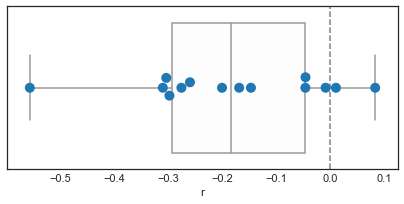

In [59]:
plt.figure(figsize=(7, 3))

sns.boxplot(data=r,
            x='r',
            color=sns.xkcd_rgb['pale grey'])
sns.swarmplot(data=r,
              x='r',
              size=10)
# plt.xlim(-0.35, 0.10)
plt.axvline(0,
            color='grey',
            linestyle='dashed');

<h5><a href="javascript:toggle()" target="_self">toggle source code</a></h5>